In [13]:
%matplotlib inline


In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [17]:
def readCsv(fileName):
    fullFileName = r'C:\Users\Owner\McGill\4thYear\COMP551\Assignments\Assignment1\Datasets\Dataset_' + fileName
    df = pd.read_csv(fullFileName, encoding='utf-8', header = None,
                 comment='#', sep=',')
    
    y = df[1].as_matrix()
    y.shape
    return df

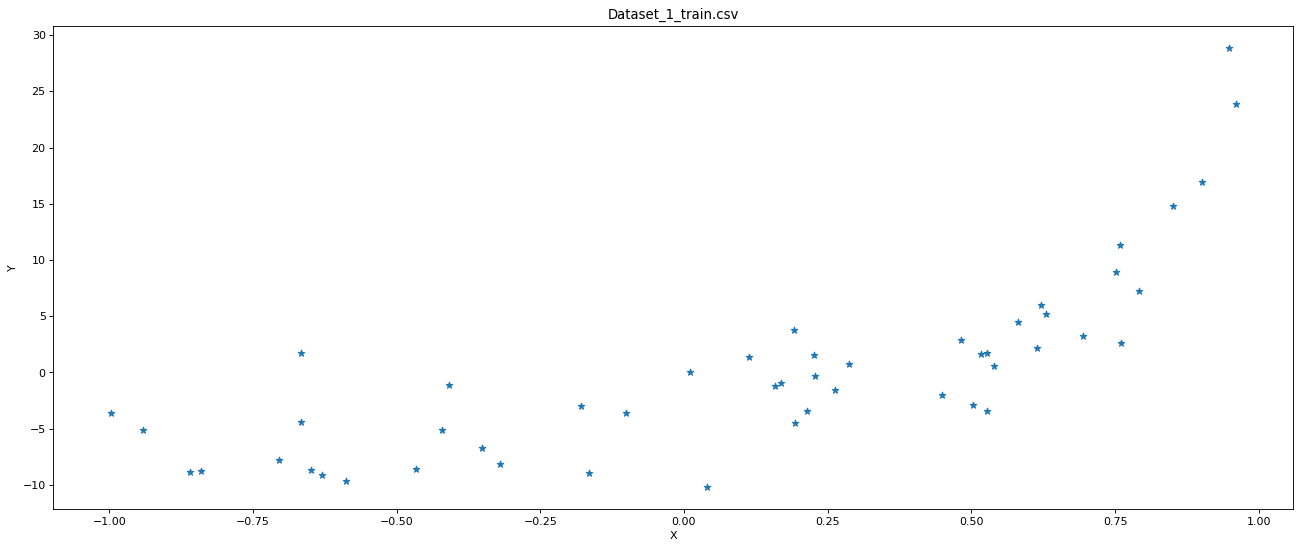

In [18]:
def graphData(fileName):
    df = readCsv(fileName)
    plt.figure(figsize=(20,8), dpi=80)
    plt.scatter(df[0], df[1], marker='*')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Dataset_1_train.csv')
    plt.show()
graphData('1_train.csv')

In [19]:
# Unused method to visualize computer polyfit
def graphPolyFit(fileName):
    df = readCsv(fileName)
    z = np.polyfit(df[0],df[1],20)
    z1 = np.poly1d(z)
    print(z)
    xp = np.linspace(-1,1,1000)
    plt.figure(figsize=(20,8), dpi=80)
    plt.scatter(df[0], df[1], marker='*')
    plt.plot(xp, z1(xp), '--')
   
    plt.show()


In [20]:
def setXMatrix():
    df = readCsv('1_train.csv')
    xMatrix = np.ones((50,21))
    newCol = df[0]
    for i in range(1,21):
        xMatrix[:,i] = newCol
        newCol = newCol*df[0]
    
#     np.set_printoptions(threshold=np.nan)
#     print(xMatrix)
#     xMatrix.shape
    return xMatrix

In [21]:
def MSE(fileName, l2):
    w1 = calculateEstimate(l2)
#     print(w1.coefficients)
    df = readCsv(fileName)
    MSE = 0;
    for i in range(0,50):
        MSE = MSE + (w1(df[0][i])-df[1][i])**2
    MSE = MSE/50
    if (l2>0):
        MSE = MSE + l2*np.dot(w1.coefficients.T, w1.coefficients)/2
    return MSE

In [22]:
def calculateEstimate(l2):
    from numpy.linalg import inv
    df = readCsv('1_train.csv')
    xMatrix = setXMatrix()
    xMatrixT = xMatrix.transpose()

    step1 = np.dot(xMatrixT,xMatrix)
    step2 = inv(np.add(step1,np.dot(l2,np.eye(21))))
    step3 = np.dot(xMatrixT, df[1])     
    
    w = np.dot(step2, step3)
    reversedW = w[::-1]
    w1 = np.poly1d(reversedW)
    return w1

In [23]:
def graphFit(fileName, l2):
    df = readCsv(fileName)
    w1 = calculateEstimate(l2)
    xp = np.linspace(-1,1,1000)
    plt.figure(figsize=(20,8), dpi=80)
    plt.scatter(df[0], df[1], marker='*')
    plt.plot(xp, w1(xp), '-')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('20 Degree Polynomial Fit (L2 Regularization)')
    plt.show()


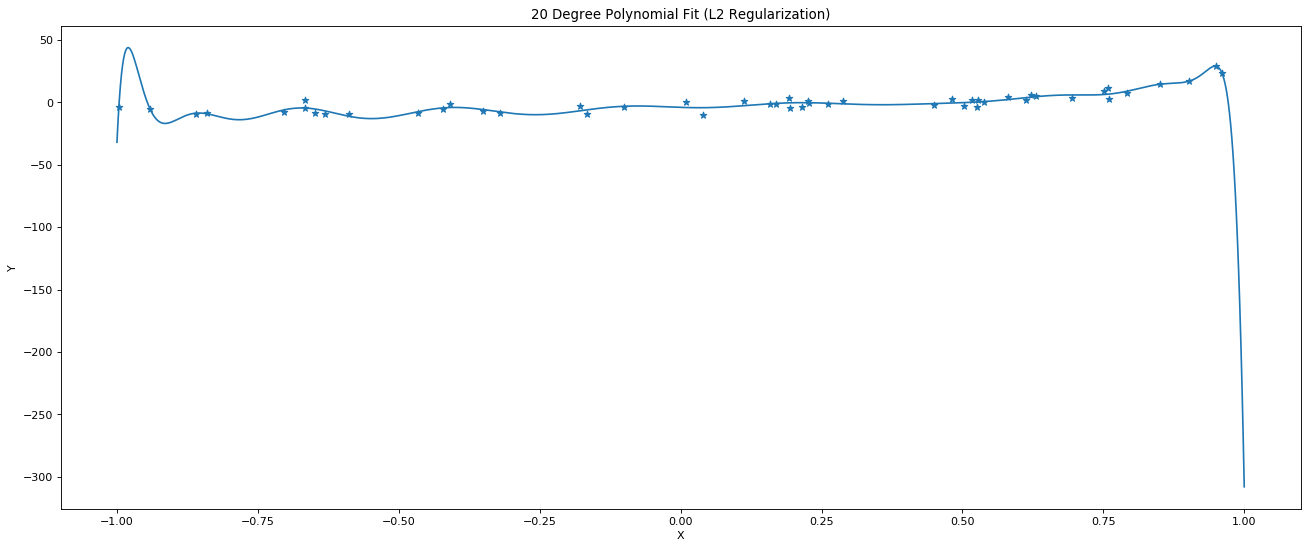

MSE Training:  6.47809787042
MSE Validation:  1418.12445607


In [24]:
graphFit('1_train.csv', 0)
print('MSE Training: ', MSE('1_train.csv', 0))
print('MSE Validation: ', MSE('1_Valid.csv', 0))
    

In [25]:
# Main Method
# graphData('1_train.csv')
def calculateMinLambda():
    MSETrainArray = list()
    MSEValidationArray = list()

    lambdas = np.linspace(0.000001, 1, 1000)
    for i in lambdas:
        MSETrainArray.append(MSE('1_train.csv', i))
        MSEValidationArray.append(MSE('1_valid.csv', i))
    
    
    plt.figure(figsize=(20,8), dpi=80)
    plt.plot(lambdas, MSETrainArray, label = 'MSE Training')
    plt.plot(lambdas, MSEValidationArray, label = 'MSE Validation')
    plt.legend(loc=1)
    plt.axvline(x=lambdas[np.argmin(MSEValidationArray)],linestyle='dashed')
    plt.xlabel('Lambda')
    plt.ylabel('MSE')
    plt.title('L2 Regularization MSE')
    plt.show()
    print(MSE('1_train.csv', 0.002003))
    print('MSE TEST: ', MSE('1_test.csv', 0.002003))

    print('MIN LAMBDA ', lambdas[np.argmin(MSEValidationArray)])
    print('MIN MSE ', min(MSEValidationArray))
    return lambdas[np.argmin(MSEValidationArray)]


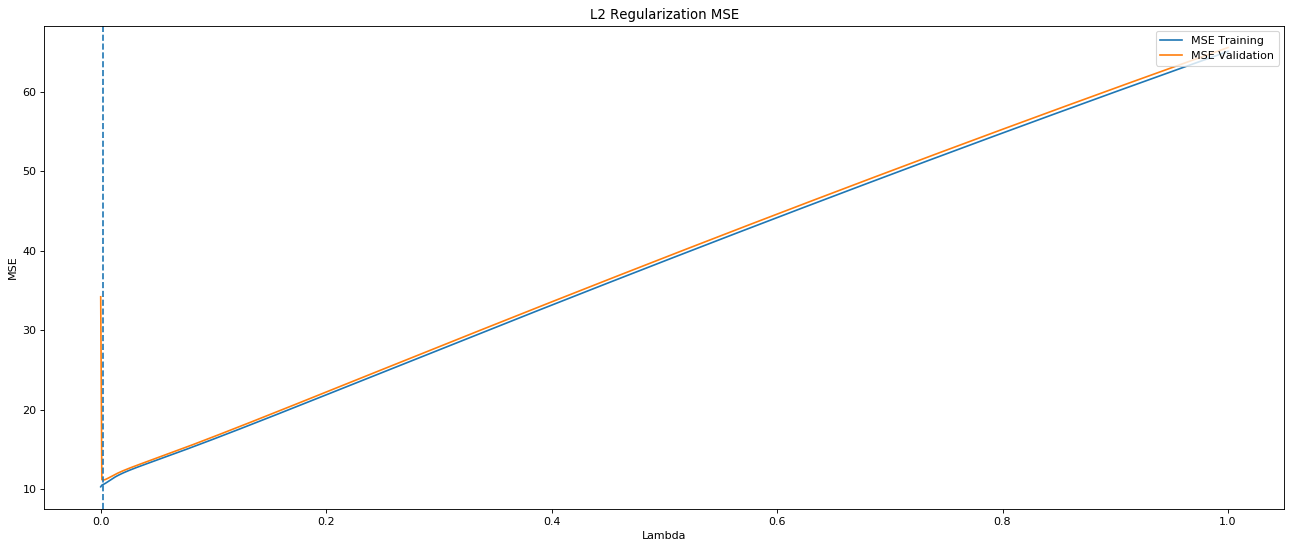

10.5722575966
MSE TEST:  12.8398882874
MIN LAMBDA  0.002003
MIN MSE  11.1630513991


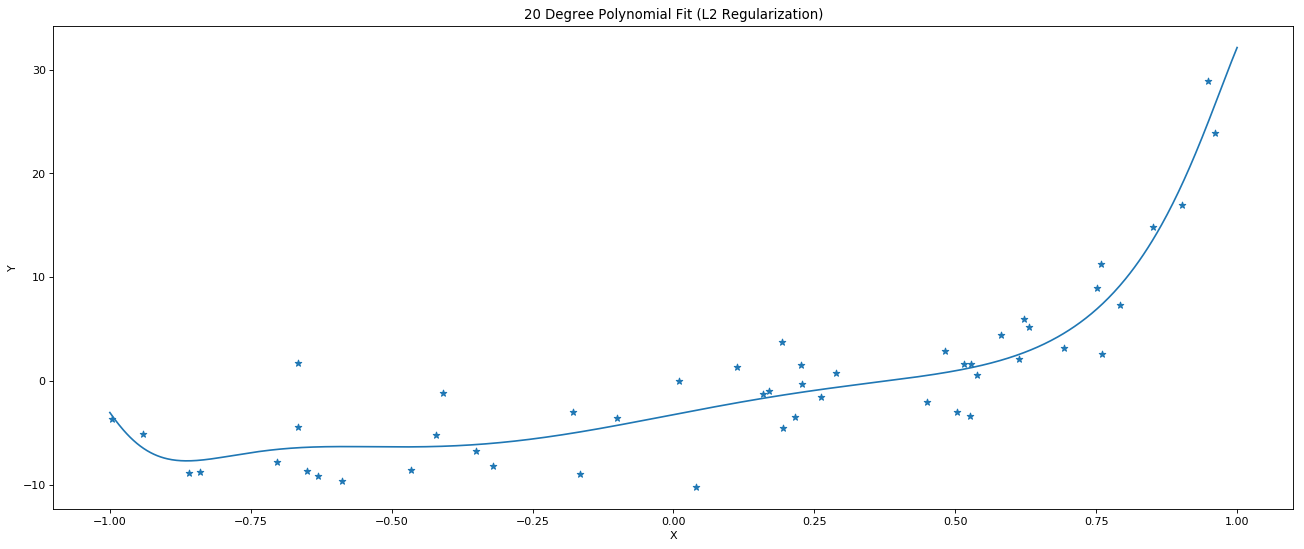

In [26]:
graphFit('1_train.csv', calculateMinLambda())




In [27]:
print('MSE Train', MSE('1_train.csv', 0.002003))
print('MSE Valid', MSE('1_valid.csv', 0.002003))
print('MSE Test', MSE('1_test.csv', 0.002003))

MSE Train 10.5722575966
MSE Valid 11.1630513991
MSE Test 12.8398882874


In [28]:
print(MSE('1_test.csv', 0.002003))

12.8398882874
